# Data Collection & Data Exploration

In [1]:
# Import data
import pandas as pd
import numpy as np
url = "https://drive.google.com/file/d/1iLx4eMi-tCazmiPy3gCbSpa8lucv6RuN/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# Get target variable
y = df['Exited']

In [3]:
# check missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Understand Numerical Feature

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

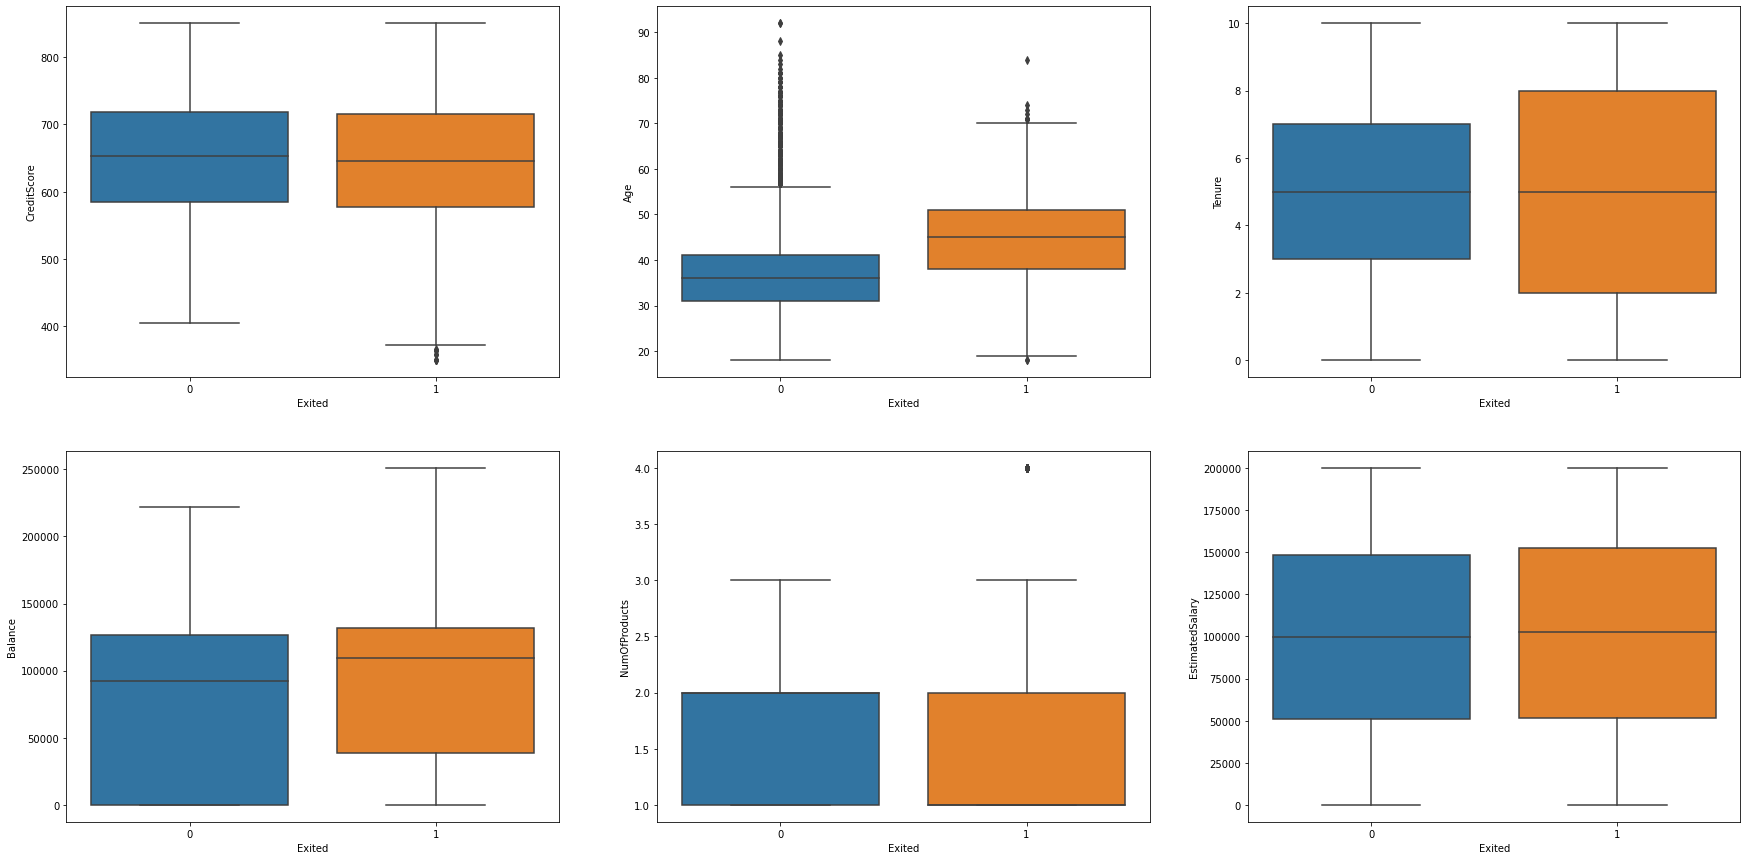

In [4]:
# boxplot for numerical feature
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(2,3, figsize = [30,15])
sns.boxplot(data = df, ax = axs[0][0], x = 'Exited', y = 'CreditScore')
sns.boxplot(data = df, ax = axs[0][1], x = 'Exited', y = 'Age')
sns.boxplot(data = df, ax = axs[0][2], x = 'Exited', y = 'Tenure')
sns.boxplot(data = df, ax = axs[1][0], x = 'Exited', y = 'Balance')
sns.boxplot(data = df, ax = axs[1][1], x = 'Exited', y = 'NumOfProducts')
sns.boxplot(data = df, ax = axs[1][2], x = 'Exited', y = 'EstimatedSalary')

In [5]:
# Check correlations between the numerical variables and the target variable
corr = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


### Understand Categorical Feature

<AxesSubplot:xlabel='Exited', ylabel='count'>

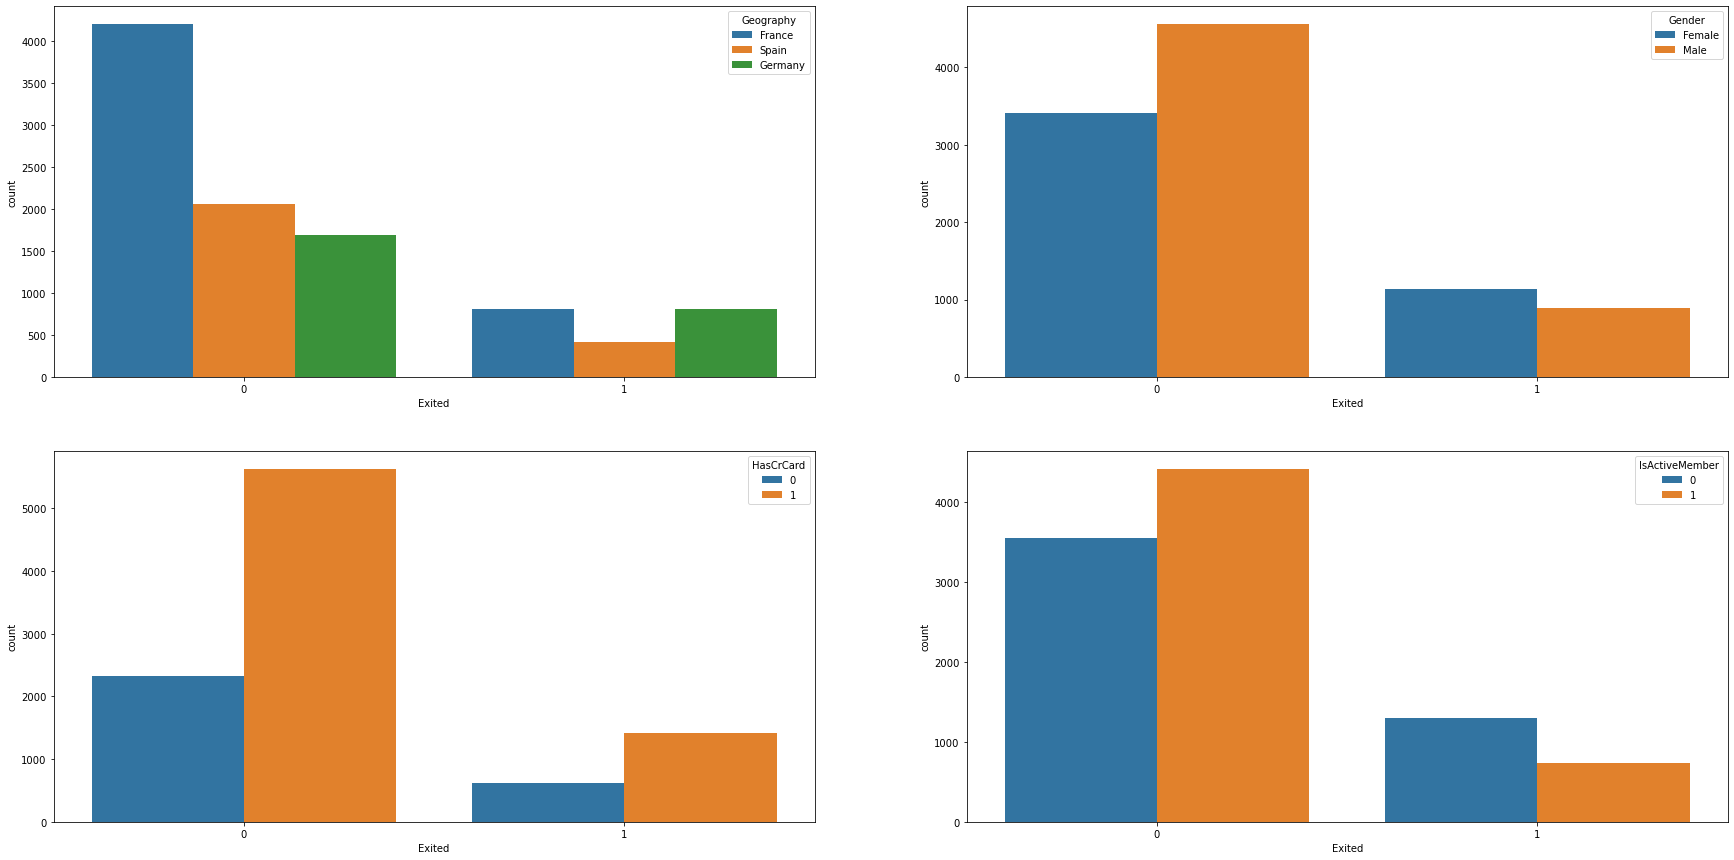

In [6]:
# Countplot for categorical feature
fig, axs = plt.subplots(2,2, figsize = [30,15])
sns.countplot(data=df, ax=axs[0][0], x='Exited', hue='Geography')
sns.countplot(data=df, ax=axs[0][1], x='Exited', hue='Gender')
sns.countplot(data=df, ax=axs[1][0], x='Exited', hue='HasCrCard')
sns.countplot(data=df, ax=axs[1][1], x='Exited', hue='IsActiveMember')

# Split Dataset into Training and Testing

In [7]:
# Get variables
X = df[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
# Numerical columns
num = X.columns[(X.dtypes == 'int64') | (X.dtypes == 'float64')]
# Categorical columns
cat = X.columns[X.dtypes == 'O']

In [8]:
# Splite data: 70: y = 1, 30: y = 0
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

In [9]:
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [10]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [11]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,516,0.0,29,2,104982.57,1,1,0,157378.50,1.0,0.0,0.0
1,745,1.0,51,3,99183.90,1,1,1,28922.25,0.0,1.0,0.0
2,850,1.0,66,4,0.00,2,0,1,64350.80,1.0,0.0,0.0
3,510,0.0,22,3,156834.34,1,0,0,44374.44,1.0,0.0,0.0
4,540,0.0,31,10,118158.74,1,1,1,158027.57,0.0,0.0,1.0


### Standardlize Data

In [12]:
# standardization: (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num])
X_train[num] = scaler.transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-1.385480,0.0,-0.938920,-1.035870,0.460208,-0.918448,0.645536,-1.033120,1.012113,1.0,0.0,0.0
1,0.979538,1.0,1.142223,-0.689110,0.367663,-0.918448,0.645536,0.967942,-1.235424,0.0,1.0,0.0
2,2.063934,1.0,2.561184,-0.342351,-1.215278,0.788704,-1.549099,0.967942,-0.615548,1.0,0.0,0.0
3,-1.447445,0.0,-1.601102,-0.689110,1.287744,-0.918448,-1.549099,-1.033120,-0.965064,1.0,0.0,0.0
4,-1.137618,0.0,-0.749725,1.738206,0.670495,-0.918448,0.645536,0.967942,1.023469,0.0,0.0,1.0


# Model Development

### Random Forest

In [13]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.8616666666666667

In [14]:
# 10-fold Cross Balidation to get the accuracy for Random Forest
cv = model_selection.cross_val_score(RF, X_train, y_train, cv = 10)
print(cv)
print("Random Forest's accuracy is " + str(cv.mean()))

[0.87714286 0.84857143 0.85857143 0.84571429 0.84428571 0.87285714
 0.86285714 0.86142857 0.86571429 0.87      ]
Random Forest's accuracy is 0.8607142857142855


In [21]:
# Find Optimal Hyperparameters
from sklearn.model_selection import GridSearchCV
hyperRF = {'n_estimators':(20,30,50,70,90),'max_depth':(1,2,5,8,10)}
gdRF = GridSearchCV(RandomForestClassifier(), hyperRF, cv = 10)
gdRF.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': (1, 2, 5, 8, 10),
                         'n_estimators': (20, 30, 50, 70, 90)})

In [22]:
# Best Hyperparameter Combination
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

print_grid_search_metrics(gdRF)

Best score: 0.8635714285714287
Best parameters set:
max_depth:10
n_estimators:70


In [23]:
# Best Model
bestRF = gdRF.best_estimator_

In [34]:
# ROC
from sklearn.metrics import roc_curve
predRF = bestRF.predict_proba(X_test)[:,1]
fprRF, tprRF, _ = roc_curve(y_test, predRF)
bestRF.predict_proba(X_test)

array([[0.9158486 , 0.0841514 ],
       [0.23648016, 0.76351984],
       [0.98333114, 0.01666886],
       ...,
       [0.67051206, 0.32948794],
       [0.8899163 , 0.1100837 ],
       [0.82874141, 0.17125859]])

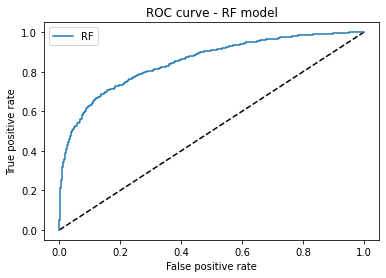

In [35]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprRF, tprRF, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [36]:
# AUC
from sklearn import metrics
metrics.auc(fprRF,tprRF)

0.8511357634109965

### Gaussian Naive Bayes

In [15]:
# Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB.score(X_test, y_test)

0.8183333333333334

In [16]:
# 10-fold Cross Balidation to get the accuracy for Random Forest
cv = model_selection.cross_val_score(GNB, X_train, y_train, cv = 10)
print(cv)
print("Random Forest's accuracy is " + str(cv.mean()))

[0.82       0.82285714 0.82857143 0.79428571 0.82       0.83285714
 0.81285714 0.81714286 0.83285714 0.82142857]
Random Forest's accuracy is 0.8202857142857143


In [25]:
# Find Optimal Hyperparameters
hyperGNB = {'var_smoothing': np.logspace(0,-9, num=50)}
gdGNB = GridSearchCV(GaussianNB(), hyperGNB, cv = 10)
gdGNB.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 6.55128557e-01, 4.29193426e-01, 2.81176870e-01,
       1.84206997e-01, 1.20679264e-01, 7.90604321e-02, 5.17947468e-02,
       3.39322177e-02, 2.22299648e-02, 1.45634848e-02, 9.54095476e-03,
       6.25055193e-03, 4.09491506e-03, 2.68269580e-03, 1.75751062e-03,
       1.15139540e-03, 7.54312006e-04, 4.9...
       3.90693994e-05, 2.55954792e-05, 1.67683294e-05, 1.09854114e-05,
       7.19685673e-06, 4.71486636e-06, 3.08884360e-06, 2.02358965e-06,
       1.32571137e-06, 8.68511374e-07, 5.68986603e-07, 3.72759372e-07,
       2.44205309e-07, 1.59985872e-07, 1.04811313e-07, 6.86648845e-08,
       4.49843267e-08, 2.94705170e-08, 1.93069773e-08, 1.26485522e-08,
       8.28642773e-09, 5.42867544e-09, 3.55648031e-09, 2.32995181e-09,
       1.52641797e-09, 1.00000000e-09])})

In [26]:
# Best Hyperparameter
print_grid_search_metrics(gdGNB)

Best score: 0.8290000000000001
Best parameters set:
var_smoothing:0.12067926406393285


In [27]:
# Best model
bestGNB = gdGNB.best_estimator_

In [37]:
# ROC
predGNB = bestGNB.predict_proba(X_test)[:,1]
fprGNB, tprGNB, _ = roc_curve(y_test, predGNB)
bestGNB.predict_proba(X_test)

array([[0.80688333, 0.19311667],
       [0.35936973, 0.64063027],
       [0.95708851, 0.04291149],
       ...,
       [0.67850328, 0.32149672],
       [0.85864031, 0.14135969],
       [0.81191086, 0.18808914]])

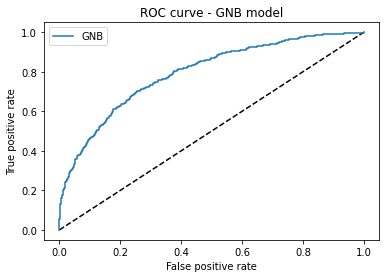

In [38]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprGNB, tprGNB, label='GNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - GNB model')
plt.legend(loc='best')
plt.show()

In [39]:
# AUC
metrics.auc(fprGNB, tprGNB)

0.7933429199159542

### Logistic Regression

In [17]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.81

In [18]:
# 10-fold Cross Balidation to get the accuracy for Random Forest
cv = model_selection.cross_val_score(LR, X_train, y_train, cv = 10)
print(cv)
print("Random Forest's accuracy is " + str(cv.mean()))

[0.80714286 0.80714286 0.83       0.79571429 0.80571429 0.81857143
 0.82       0.79285714 0.82428571 0.80571429]
Random Forest's accuracy is 0.8107142857142857


In [28]:
# Find Optimal Hyperparameters
hyperLR = {'penalty':('l1','l2'), 'C':(0.01, 0.2,0.5,0.7,1),'solver': ['liblinear']}
gdLR = GridSearchCV(LogisticRegression(), hyperLR, cv = 10)
gdLR.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': (0.01, 0.2, 0.5, 0.7, 1), 'penalty': ('l1', 'l2'),
                         'solver': ['liblinear']})

In [29]:
# Best Hyperparameters Combination
print_grid_search_metrics(gdLR)

Best score: 0.8111428571428572
Best parameters set:
C:0.2
penalty:l1
solver:liblinear


In [30]:
# Best Model
bestLR = gdLR.best_estimator_

In [40]:
# ROC
predLR = bestLR.predict_proba(X_test)[:,1]
fprLR, tprLR, _ = roc_curve(y_test, predLR)
bestLR.predict_proba(X_test)

array([[0.85644589, 0.14355411],
       [0.31825708, 0.68174292],
       [0.92228532, 0.07771468],
       ...,
       [0.63099387, 0.36900613],
       [0.85070267, 0.14929733],
       [0.79147601, 0.20852399]])

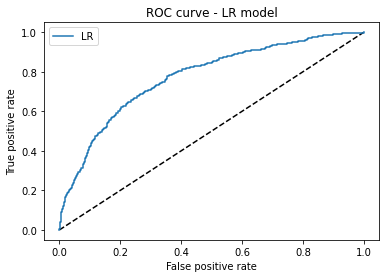

In [41]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprLR, tprLR, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR model')
plt.legend(loc='best')
plt.show()

In [42]:
# AUC
metrics.auc(fprLR, tprLR)

0.7729651519272388

### K-Nearest Neighbors

In [19]:
# K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN.score(X_test, y_test)

0.8356666666666667

In [20]:
# 10-fold Cross Balidation to get the accuracy for Random Forest
cv = model_selection.cross_val_score(KNN, X_train, y_train, cv = 10)
print(cv)
print("Random Forest's accuracy is " + str(cv.mean()))

[0.85428571 0.85428571 0.82285714 0.81857143 0.83428571 0.85714286
 0.83571429 0.84285714 0.81857143 0.84285714]
Random Forest's accuracy is 0.8381428571428572


In [31]:
# Find Optimal Hyperparameters
hyperKNN = {'n_neighbors':[1,2,5,8,10]}
gdKNN = GridSearchCV(KNeighborsClassifier(), hyperKNN, cv = 10)
gdKNN.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 8, 10]})

In [32]:
# Best Hyperparameters
print_grid_search_metrics(gdKNN)

Best score: 0.8405714285714285
Best parameters set:
n_neighbors:10


In [33]:
# Best Model
bestKNN = gdKNN.best_estimator_

In [43]:
# ROC
predKNN = bestKNN.predict_proba(X_test)[:,1]
fprKNN, tprKNN, _ = roc_curve(y_test, predKNN)
bestKNN.predict_proba(X_test)

array([[1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       ...,
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2]])

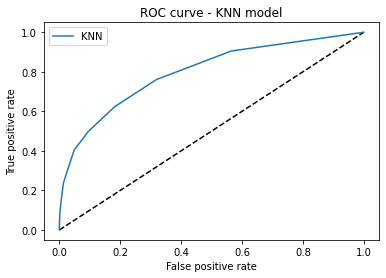

In [44]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprKNN, tprKNN, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN model')
plt.legend(loc='best')
plt.show()

In [45]:
# AUC
metrics.auc(fprKNN, tprKNN)

0.7973170813582986

## Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)


confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,bestRF.predict(X_test))),
    ("Gaussian Naive Bayes", confusion_matrix(y_test, bestGNB.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,bestLR.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, bestKNN.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8623333333333333
precision is: 0.801829268292683
recall is: 0.43044189852700493

Gaussian Naive Bayes
Accuracy is: 0.8293333333333334
precision is: 0.7438423645320197
recall is: 0.24713584288052373

Logistic Regression
Accuracy is: 0.8123333333333334
precision is: 0.6237113402061856
recall is: 0.19803600654664485

K nearest neighbor
Accuracy is: 0.8366666666666667
precision is: 0.7489711934156379
recall is: 0.2978723404255319

